# Search for Pulse Reset
Using the Keysight AWG

In [1]:
cd ..

C:\Users\qlab\Documents\GitHub\Auspex


In [13]:
import itertools
import numpy as np

from auspex.filters.plot import Plotter, MeshPlotter
from auspex.filters.io import WriteToHDF5
from auspex.refine import delaunay_refine_from_file

from test.plotting_test_mesh import TestExperiment

In [15]:
exp  = TestExperiment()
fig1 = MeshPlotter(name="Plot The Mesh", notebook=True)
wr   = WriteToHDF5("test_mesh.h5")

edges = [(exp.voltage, wr.sink)]
exp.set_graph(edges)
exp.add_direct_plotter(fig1)

# Construct the coarse grid
coarse_ts = np.linspace(0.0, 10.0, 7)
coarse_vs = np.linspace(0.0, 7.5, 7)
points    = [coarse_ts, coarse_vs]
points    = list(itertools.product(*points))

refine_func = delaunay_refine_from_file(wr, 'duration', 'amplitude', 'voltage', max_points=1000, plotter=fig1)

exp.add_sweep([exp.duration, exp.amplitude], points, refine_func=refine_func)
exp.run_sweeps()

C:\Users\qlab\Anaconda3\lib\site-packages\bokeh\util\deprecation.py:33: BokehDeprecationWarning: bokeh.io.hplot() was deprecated in Bokeh 0.12.0 and will be removed, use bokeh.models.layouts.Row instead.
  warn(message)


Loading BokehJS ...

20 new points added.
Reached 69 points.
22 new points added.
Reached 91 points.
37 new points added.
Reached 128 points.
26 new points added.
Reached 154 points.
66 new points added.
Reached 220 points.
56 new points added.
Reached 276 points.
101 new points added.
Reached 377 points.
145 new points added.
Reached 522 points.
220 new points added.
Reached 742 points.
170 new points added.
Reached 912 points.
407 new points added.
Reached maximum points (1000).
Killing bokeh server thread 780


Exception ignored in: <bound method BokehServerThread.__del__ of <BokehServerThread(Thread-7, stopped daemon 9972)>>
Traceback (most recent call last):
  File "c:\users\qlab\documents\github\auspex\src\auspex\plotting.py", line 24, in __del__
    self.join()
  File "c:\users\qlab\documents\github\auspex\src\auspex\plotting.py", line 35, in join
    for child_proc in psutil.Process(self.p.pid).children():
  File "C:\Users\qlab\Anaconda3\lib\site-packages\psutil\__init__.py", line 364, in __init__
    self._init(pid)
  File "C:\Users\qlab\Anaconda3\lib\site-packages\psutil\__init__.py", line 404, in _init
    raise NoSuchProcess(pid, None, msg)
psutil.NoSuchProcess: psutil.NoSuchProcess no process found with pid 780


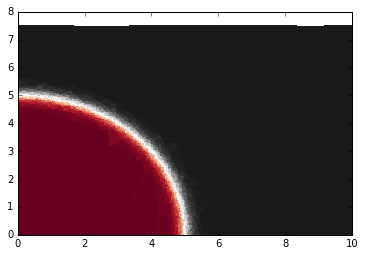

In [22]:
import h5py
import auspex.analysis.switching as sw
import matplotlib.pyplot as plt
%matplotlib inline
with h5py.File(wr.filename) as f:
    zs = f['data'].value['voltage']
    ys = f['data'].value['amplitude']
    xs = f['data'].value['duration']
    points = np.array([xs, ys]).transpose()
    
    mesh, scale_factors = sw.scaled_Delaunay(points)
    plt.tripcolor(xs, ys, mesh.simplices, zs, cmap=plt.cm.RdGy)
    plt.show()